## Import Library

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np

## Import data

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
df = pd.read_csv("flipkart_com-ecommerce_sample.csv")
df

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

## Understand data

In [5]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

## Data cleaning


In [6]:
drop = ['uniq_id','product_url','image','is_FK_Advantage_product','description','overall_rating','product_rating','product_specifications']

In [7]:
df_cleaned = df.drop(columns = drop, axis = 1)
df_cleaned

,crawl_timestamp,product_name,product_category_tree,pid,retail_price,discounted_price,brand
0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,Alisha
1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor
2,2016-03-25 22:59:23 +0000,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,AW
3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha
4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons
...,...,...,...,...,...,...,...
19995,2015-12-01 10:15:43 +0000,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign
19996,2015-12-01 10:15:43 +0000,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra
19997,2015-12-01 10:15:43 +0000,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection
19998,2015-12-01 10:15:43 +0000,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection


In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crawl_timestamp        20000 non-null  object 
 1   product_name           20000 non-null  object 
 2   product_category_tree  20000 non-null  object 
 3   pid                    20000 non-null  object 
 4   retail_price           19922 non-null  float64
 5   discounted_price       19922 non-null  float64
 6   brand                  14136 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [9]:
df_cleaned['crawl_timestamp'] = pd.to_datetime(df_cleaned['crawl_timestamp'])

df_cleaned['crawl_timestamp'] = df_cleaned['crawl_timestamp'].dt.date
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   crawl_timestamp        20000 non-null  object 
 1   product_name           20000 non-null  object 
 2   product_category_tree  20000 non-null  object 
 3   pid                    20000 non-null  object 
 4   retail_price           19922 non-null  float64
 5   discounted_price       19922 non-null  float64
 6   brand                  14136 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [10]:
df_cleaned.rename(columns={'crawl_timestamp': 'Date','pid':'product_id'}, inplace=True)
df_cleaned

,Date,product_name,product_category_tree,product_id,retail_price,discounted_price,brand
0,2016-03-25,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,Alisha
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor
2,2016-03-25,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,AW
3,2016-03-25,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons
...,...,...,...,...,...,...,...
19995,2015-12-01,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign
19996,2015-12-01,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra
19997,2015-12-01,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection
19998,2015-12-01,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection


In [11]:
df_cleaned.to_csv('cleaned_part1.csv', index=False)

In [12]:
df_cleaned[['main_category', 'sub_category1', 'sub_category2', 'sub_category3', 'sub_category4','sub_category5']] = df['product_category_tree'].str.split('>>', expand=True, n=5)
df_cleaned

,Date,product_name,product_category_tree,product_id,retail_price,discounted_price,brand,main_category,sub_category1,sub_category2,sub_category3,sub_category4,sub_category5
0,2016-03-25,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,Alisha,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]"
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor,"[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,None,None
2,2016-03-25,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,AW,"[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]",None,None
3,2016-03-25,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]"
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons,"[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""]",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign,"[""Baby Care",Baby & Kids Gifts,Stickers,"WallDesign Stickers""]",None,None
19996,2015-12-01,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra,"[""Baby Care",Baby & Kids Gifts,Stickers,"Wallmantra Stickers""]",None,None
19997,2015-12-01,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None,None
19998,2015-12-01,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None,None


In [13]:
df_cleaned.iloc[33]

Date                                                            2016-06-24
product_name                 Shopmania Music Band A5 Notebook Spiral Bound
product_category_tree    ["Pens & Stationery >> Diaries & Notebooks >> ...
product_id                                                DIAEJ6Z8KQFWDEGH
retail_price                                                         499.0
discounted_price                                                     275.0
brand                                                            Shopmania
main_category                                         ["Pens & Stationery 
sub_category1                                         Diaries & Notebooks 
sub_category2                                                   Notebooks 
sub_category3                                                    Designer 
sub_category4                                          Shopmania Designer 
sub_category5             Shopmania Music Band A5 Notebook Spiral Bound...
Name: 33, dtype: object

In [14]:
df_cleaned_2 = df_cleaned.drop(["product_category_tree","sub_category5"],axis = 1)
df_cleaned_2

,Date,product_name,product_id,retail_price,discounted_price,brand,main_category,sub_category1,sub_category2,sub_category3,sub_category4
0,2016-03-25,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Alisha,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor,"[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,None
2,2016-03-25,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,AW,"[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]",None
3,2016-03-25,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons,"[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""]"
...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign,"[""Baby Care",Baby & Kids Gifts,Stickers,"WallDesign Stickers""]",None
19996,2015-12-01,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra,"[""Baby Care",Baby & Kids Gifts,Stickers,"Wallmantra Stickers""]",None
19997,2015-12-01,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None
19998,2015-12-01,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection,"[""Baby Care",Baby & Kids Gifts,Stickers,"Elite Collection Stickers""]",None


In [15]:
df_cleaned.to_csv('cleaned_part1.csv', index=False)

In [16]:
def remove_symbols(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: x.strip('["]') if isinstance(x, str) else x)
    return df

In [17]:
columns = ["main_category","sub_category1","sub_category2","sub_category3","sub_category4"]
for cols in columns:
    df_cleaned_2 = remove_symbols(df_cleaned_2,cols)

In [18]:
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              20000 non-null  object 
 1   product_name      20000 non-null  object 
 2   product_id        20000 non-null  object 
 3   retail_price      19922 non-null  float64
 4   discounted_price  19922 non-null  float64
 5   brand             14136 non-null  object 
 6   main_category     20000 non-null  object 
 7   sub_category1     19672 non-null  object 
 8   sub_category2     18543 non-null  object 
 9   sub_category3     14124 non-null  object 
 10  sub_category4     9359 non-null   object 
dtypes: float64(2), object(9)
memory usage: 1.7+ MB


In [19]:
categories = ["brand","main_category","sub_category1","sub_category2","sub_category3","sub_category4"]

In [20]:
for cols in categories:
    df_cleaned_2[cols] = df_cleaned_2[cols].astype('category')

In [21]:
df_cleaned_2['Date'] = pd.to_datetime(df_cleaned_2['Date'])
df_cleaned_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              20000 non-null  datetime64[ns]
 1   product_name      20000 non-null  object        
 2   product_id        20000 non-null  object        
 3   retail_price      19922 non-null  float64       
 4   discounted_price  19922 non-null  float64       
 5   brand             14136 non-null  category      
 6   main_category     20000 non-null  category      
 7   sub_category1     19672 non-null  category      
 8   sub_category2     18543 non-null  category      
 9   sub_category3     14124 non-null  category      
 10  sub_category4     9359 non-null   category      
dtypes: category(6), datetime64[ns](1), float64(2), object(2)
memory usage: 1.4+ MB


In [22]:
unique = df_cleaned_2["main_category"].unique()
unique_df = pd.DataFrame(unique)
unique_df.to_csv('unique.csv', index=False)

In [23]:
# Assuming df_cleaned_2 is your DataFrame
unique_in_main_category = df_cleaned_2['main_category'].value_counts().reset_index()
unique_in_main_category.columns = ['main_category','count']

In [24]:
unique_in_main_category.to_csv('unique.csv', index=False)

In [25]:
df_cleaned_2.to_csv('cleaned_part1.csv', index = False)

In [27]:
df_temp = pd.read_excel("unique.xlsx")
df_temp

,main_category,Column2,super_category,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Clothing,6198,Fashion,NaN,NaN,"Beauty, Health, Personal & Household Care"
1,Jewellery,3531,Fashion,NaN,NaN,Electronics
2,Footwear,1227,Fashion,NaN,NaN,Fashion
3,Mobiles & Accessories,1099,Electronics,NaN,NaN,Furniture
4,Automotive,1012,Automotive,NaN,NaN,Media
...,...,...,...,...,...,...
261,Laser X Checkered Men's Boxer (Pack of 4),1,Fashion,NaN,NaN,NaN
262,Leading lady Women's Camisole,1,Fashion,NaN,NaN,NaN
263,Legmark Slim Fit Women's Blue Jeans,1,Fashion,NaN,NaN,NaN
264,Legmark Slim Fit Women's Light Blue Jeans,1,Fashion,NaN,NaN,NaN


### Map category

In [28]:
# Create a dictionary mapping main_category to super_category
category_mapping = df_temp.set_index('main_category')['super_category'].to_dict()

# Impute the super_category in the original dataset based on main_category
df_cleaned_2['super_category'] = df_cleaned_2['main_category'].map(category_mapping)

# Display the updated original dataset
print(df_cleaned_2)


            Date                             product_name        product_id  \
0     2016-03-25      Alisha Solid Women's Cycling Shorts  SRTEH2FF9KEDEFGF   
1     2016-03-25      FabHomeDecor Fabric Double Sofa Bed  SBEEH3QGU7MFYJFY   
2     2016-03-25                               AW Bellies  SHOEH4GRSUBJGZXE   
3     2016-03-25      Alisha Solid Women's Cycling Shorts  SRTEH2F6HUZMQ6SJ   
4     2016-03-25    Sicons All Purpose Arnica Dog Shampoo  PSOEH3ZYDMSYARJ5   
...          ...                                      ...               ...   
19995 2015-12-01           WallDesign Small Vinyl Sticker  STIE7KFJAKSTDY9G   
19996 2015-12-01  Wallmantra Large Vinyl Stickers Sticker  STIE9F5URNQGJCGH   
19997 2015-12-01  Elite Collection Medium Acrylic Sticker  STIE7VAYDKQZEBSD   
19998 2015-12-01  Elite Collection Medium Acrylic Sticker  STIE8YSVEPPCZ42Y   
19999 2015-12-01  Elite Collection Medium Acrylic Sticker  STIE88KN9ZDSGZKY   

       retail_price  discounted_price             b

In [29]:
df_cleaned_2.loc[3218, 'super_category'] = 'Toys, Hobby & DIY'

In [30]:
df_cleaned_3 = df_cleaned_2.drop(["sub_category3","sub_category4"], axis = 1)
df_cleaned_3

,Date,product_name,product_id,retail_price,discounted_price,brand,main_category,sub_category1,sub_category2,super_category
0,2016-03-25,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Fashion
1,2016-03-25,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons,Furniture
2,2016-03-25,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0,AW,Footwear,Women's Footwear,Ballerinas,Fashion
3,2016-03-25,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Fashion
4,2016-03-25,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0,Sicons,Pet Supplies,Grooming,Skin & Coat Care,"Beauty, Health, Personal & Household Care"
...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0,WallDesign,Baby Care,Baby & Kids Gifts,Stickers,"Beauty, Health, Personal & Household Care"
19996,2015-12-01,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers,"Beauty, Health, Personal & Household Care"
19997,2015-12-01,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers,"Beauty, Health, Personal & Household Care"
19998,2015-12-01,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers,"Beauty, Health, Personal & Household Care"


In [31]:
desired_column_order = ['Date', 'product_id', 'product_name','super_category', 'main_category','sub_category1', 'sub_category2','brand','retail_price', 'discounted_price']

In [32]:
df_cleaned_3 = df_cleaned_3[desired_column_order]
df_cleaned_3

,Date,product_id,product_name,super_category,main_category,sub_category1,sub_category2,brand,retail_price,discounted_price
0,2016-03-25,SRTEH2FF9KEDEFGF,Alisha Solid Women's Cycling Shorts,Fashion,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Alisha,999.0,379.0
1,2016-03-25,SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed,Furniture,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor,32157.0,22646.0
2,2016-03-25,SHOEH4GRSUBJGZXE,AW Bellies,Fashion,Footwear,Women's Footwear,Ballerinas,AW,999.0,499.0
3,2016-03-25,SRTEH2F6HUZMQ6SJ,Alisha Solid Women's Cycling Shorts,Fashion,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Alisha,699.0,267.0
4,2016-03-25,PSOEH3ZYDMSYARJ5,Sicons All Purpose Arnica Dog Shampoo,"Beauty, Health, Personal & Household Care",Pet Supplies,Grooming,Skin & Coat Care,Sicons,220.0,210.0
...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01,STIE7KFJAKSTDY9G,WallDesign Small Vinyl Sticker,"Beauty, Health, Personal & Household Care",Baby Care,Baby & Kids Gifts,Stickers,WallDesign,1500.0,730.0
19996,2015-12-01,STIE9F5URNQGJCGH,Wallmantra Large Vinyl Stickers Sticker,"Beauty, Health, Personal & Household Care",Baby Care,Baby & Kids Gifts,Stickers,Wallmantra,1429.0,1143.0
19997,2015-12-01,STIE7VAYDKQZEBSD,Elite Collection Medium Acrylic Sticker,"Beauty, Health, Personal & Household Care",Baby Care,Baby & Kids Gifts,Stickers,Elite Collection,1299.0,999.0
19998,2015-12-01,STIE8YSVEPPCZ42Y,Elite Collection Medium Acrylic Sticker,"Beauty, Health, Personal & Household Care",Baby Care,Baby & Kids Gifts,Stickers,Elite Collection,1499.0,1199.0


## Fill NA values

In [33]:
df_trial = df_cleaned_3.copy()

In [34]:
# Assuming df_trials is your DataFrame
df_trial.dropna(subset=['retail_price','sub_category2'], inplace=True)

In [35]:
# Convert 'brand' column to string type to allow manipulation
df_trial['brand'] = df_trial['brand'].astype(str)

# Replace 'nan' string with actual NaN values in the 'brand' column
df_trial['brand'] = df_trial['brand'].replace('nan', float('nan'))

# Splitting the product_name column to extract the first word
first_word = df_trial['product_name'].str.split().str[0]

# Update the 'brand' column with the first word where it's missing
df_trial['brand'] = df_trial['brand'].fillna(first_word)

df_trial['brand'] = df_trial['brand'].astype('category')

# Displaying the DataFrame after filling empty values in the brand column
print(df_trial)

            Date        product_id                             product_name  \
0     2016-03-25  SRTEH2FF9KEDEFGF      Alisha Solid Women's Cycling Shorts   
1     2016-03-25  SBEEH3QGU7MFYJFY      FabHomeDecor Fabric Double Sofa Bed   
2     2016-03-25  SHOEH4GRSUBJGZXE                               AW Bellies   
3     2016-03-25  SRTEH2F6HUZMQ6SJ      Alisha Solid Women's Cycling Shorts   
4     2016-03-25  PSOEH3ZYDMSYARJ5    Sicons All Purpose Arnica Dog Shampoo   
...          ...               ...                                      ...   
19995 2015-12-01  STIE7KFJAKSTDY9G           WallDesign Small Vinyl Sticker   
19996 2015-12-01  STIE9F5URNQGJCGH  Wallmantra Large Vinyl Stickers Sticker   
19997 2015-12-01  STIE7VAYDKQZEBSD  Elite Collection Medium Acrylic Sticker   
19998 2015-12-01  STIE8YSVEPPCZ42Y  Elite Collection Medium Acrylic Sticker   
19999 2015-12-01  STIE88KN9ZDSGZKY  Elite Collection Medium Acrylic Sticker   

                                  super_category  m

In [36]:
df_trial.isna().sum()

Date                0
product_id          0
product_name        0
super_category      0
main_category       0
sub_category1       0
sub_category2       0
brand               0
retail_price        0
discounted_price    0
dtype: int64

In [37]:
(df_trial['brand'] == 'nan').sum()

0

In [38]:
df_trial[df_trial["product_id"]=="TSHE8GGHEMKPZHGH"]

,Date,product_id,product_name,super_category,main_category,sub_category1,sub_category2,brand,retail_price,discounted_price
10017,2016-01-07,TSHE8GGHEMKPZHGH,Baklol Printed Men's Round Neck T-Shirt,Fashion,Clothing,Men's Clothing,T-Shirts,Baklol,699.0,299.0


In [39]:
df_trial.to_csv('df_trial.csv', index = False)

## Bootstrap

In [40]:
dftemp = df_trial

In [41]:
np.random.seed(10)
desired_rows = 1000
bootstrapped_data = [dftemp.sample(n=desired_rows, replace=True) for _ in range(desired_rows)]
bootstrapped_df = pd.concat(bootstrapped_data, ignore_index=True)

# Check the new DataFrame size
print("New DataFrame size:", bootstrapped_df.shape)

New DataFrame size: (1000000, 10)


In [42]:
bootstrapped_df.isna().sum()

Date                0
product_id          0
product_name        0
super_category      0
main_category       0
sub_category1       0
sub_category2       0
brand               0
retail_price        0
discounted_price    0
dtype: int64

In [43]:
bootstrapped_df.to_csv('bootstaped_1.csv', index=False)

In [44]:
df_new = pd.read_csv("bootstaped_1.csv")
df_new

,Date,product_id,product_name,super_category,main_category,sub_category1,sub_category2,brand,retail_price,discounted_price
0,2016-03-03,STCEGDYJXWPN4VFY,Polo House USA ExclusiveTrolleyBag15OE Cabin L...,Fashion,"Bags, Wallets & Belts",Luggage & Travel,Suitcases,Polo House USA,12999.0,4207.0
1,2016-03-07,ACCEGKXQQTDGDXZP,Lexel High Quality Braided Metal Head Pure Cop...,Electronics,Mobiles & Accessories,Mobile Accessories,Cables,Lexel,999.0,339.0
2,2016-03-03,AFGEFJSGDNCGEZ6C,Sentinel Metamorforce Dino Getter 2,"Toys, Hobby & DIY",Toys & School Supplies,Action Figures,Sentinel Action Figures,Sentinel,17254.0,14665.0
3,2016-03-07,ACCEGKXQ9ZFSWKMU,Lexel High Quality Braided Metal Head Pure Cop...,Electronics,Mobiles & Accessories,Mobile Accessories,Cables,Lexel,999.0,339.0
4,2016-01-07,TSHE8GGHEMKPZHGH,Baklol Printed Men's Round Neck T-Shirt,Fashion,Clothing,Men's Clothing,T-Shirts,Baklol,699.0,299.0
...,...,...,...,...,...,...,...,...,...,...
999995,2015-12-30,BBAEDVQFRG4ZS5GB,"Vaishali Bindi and Bangles Brass, Copper Bangl...",Fashion,Jewellery,"Bangles, Bracelets & Armlets",Bangles,Vaishali Bindi and Bangles,999.0,399.0
999996,2016-01-06,TOPEB7DNYWQHG7AE,Butterfly Wears Casual Short Sleeve Solid Wome...,Fashion,Clothing,Women's Clothing,Western Wear,Butterfly,999.0,449.0
999997,2015-12-20,BBADSEZDGVYZWJSE,925 Silver Alloy Silver Bracelet,Fashion,Jewellery,"Bangles, Bracelets & Armlets",Bracelets,925 Silver,1599.0,1498.0
999998,2015-12-01,NKCECGVA5EG3ZCZG,JEWELIZER Bohemian Yellow Gold Plated Alloy Ne...,Fashion,Jewellery,Necklaces & Chains,Necklaces,JEWELIZER,1099.0,399.0


In [45]:
df_new.isna().sum()

Date                0
product_id          0
product_name        0
super_category      0
main_category       0
sub_category1       0
sub_category2       0
brand               0
retail_price        0
discounted_price    0
dtype: int64

## Create target column

In [46]:
# Define percentages for each super category
percentages = {
    'Beauty, Health, Personal & Household Care': 0.045,
    'Electronics': 0.066,
    'Fashion': 0.119,
    'Furniture': 0.041,
    'Media': 0.048,
    'Toys, Hobby & DIY': 0.063,
    'Automotive': 0.06
}

# Calculate the number of rows to be marked as returned for each super category
for super_category, percentage in percentages.items():
    total_rows = df_new[df_new['super_category'] == super_category].shape[0]
    num_returned = int(total_rows * percentage)
    df_new.loc[df_new['super_category'] == super_category, 'return'] = np.random.choice([0, 1], total_rows, p=[1-percentage, percentage])

# Set the value of the "return" column to 0 for the remaining rows
df_new['return'].fillna(0, inplace=True)

print(df_new)

              Date        product_id  \
0       2016-03-03  STCEGDYJXWPN4VFY   
1       2016-03-07  ACCEGKXQQTDGDXZP   
2       2016-03-03  AFGEFJSGDNCGEZ6C   
3       2016-03-07  ACCEGKXQ9ZFSWKMU   
4       2016-01-07  TSHE8GGHEMKPZHGH   
...            ...               ...   
999995  2015-12-30  BBAEDVQFRG4ZS5GB   
999996  2016-01-06  TOPEB7DNYWQHG7AE   
999997  2015-12-20  BBADSEZDGVYZWJSE   
999998  2015-12-01  NKCECGVA5EG3ZCZG   
999999  2016-01-01  BLAEEDSGY6APNYWQ   

                                             product_name     super_category  \
0       Polo House USA ExclusiveTrolleyBag15OE Cabin L...            Fashion   
1       Lexel High Quality Braided Metal Head Pure Cop...        Electronics   
2                     Sentinel Metamorforce Dino Getter 2  Toys, Hobby & DIY   
3       Lexel High Quality Braided Metal Head Pure Cop...        Electronics   
4                 Baklol Printed Men's Round Neck T-Shirt            Fashion   
...                                    

C:\Users\zikre\AppData\Local\Temp\ipykernel_22716\507690746.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['return'].fillna(0, inplace=True)


In [47]:
df_new.to_csv('final dataset.csv', index=False)

In [48]:
df_new.tail()

,Date,product_id,product_name,super_category,main_category,sub_category1,sub_category2,brand,retail_price,discounted_price,return
999995,2015-12-30,BBAEDVQFRG4ZS5GB,"Vaishali Bindi and Bangles Brass, Copper Bangl...",Fashion,Jewellery,"Bangles, Bracelets & Armlets",Bangles,Vaishali Bindi and Bangles,999.0,399.0,0.0
999996,2016-01-06,TOPEB7DNYWQHG7AE,Butterfly Wears Casual Short Sleeve Solid Wome...,Fashion,Clothing,Women's Clothing,Western Wear,Butterfly,999.0,449.0,0.0
999997,2015-12-20,BBADSEZDGVYZWJSE,925 Silver Alloy Silver Bracelet,Fashion,Jewellery,"Bangles, Bracelets & Armlets",Bracelets,925 Silver,1599.0,1498.0,0.0
999998,2015-12-01,NKCECGVA5EG3ZCZG,JEWELIZER Bohemian Yellow Gold Plated Alloy Ne...,Fashion,Jewellery,Necklaces & Chains,Necklaces,JEWELIZER,1099.0,399.0,0.0
999999,2016-01-01,BLAEEDSGY6APNYWQ,Valtellina Abstract Double Blanket Brown,Furniture,Home Furnishing,Bed Linen,"Blankets, Quilts & Dohars",Valtellina,1999.0,799.0,0.0


In [49]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Separate the minority and majority classes
minority_class = df_new[df_new['return'] == 1]
majority_class = df_new[df_new['return'] == 0]

# Perform undersampling on the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,    # Sample without replacement
                                 n_samples=len(minority_class),  # Match number of samples in minority class
                                 random_state=42)  # For reproducibility

# Combine minority class with undersampled majority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the data
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
df_new.groupby('return')['return'].apply(lambda x: x.duplicated().sum()).reset_index(name='duplicate_count')

,return,duplicate_count
0,0.0,909622
1,1.0,90376


In [51]:
df_new_no_duplicates = df_new.drop_duplicates()
len(df_new_no_duplicates)

36425

In [52]:
df_new_no_duplicates[df_new_no_duplicates['return'] == 1].shape

(17956, 11)

In [53]:
df_new_no_duplicates[df_new_no_duplicates['return'] == 0].shape

(18469, 11)

In [54]:
# Assuming you have a DataFrame named assets containing the relevant data

# Group by 'RETURN_TYPE' and 'SUPER_CATEGORY', then count the number of rows in each group
count_by_super_category = df_new_no_duplicates.groupby(['return', 'super_category']).size().reset_index(name='count')

# Display the result
print(count_by_super_category)


    return                             super_category  count
0      0.0                                 Automotive   1001
1      0.0  Beauty, Health, Personal & Household Care   1264
2      0.0                                Electronics   2272
3      0.0                                    Fashion  10207
4      0.0                                  Furniture   2461
5      0.0                                      Media     34
6      0.0                          Toys, Hobby & DIY   1230
7      1.0                                 Automotive    965
8      1.0  Beauty, Health, Personal & Household Care   1161
9      1.0                                Electronics   2208
10     1.0                                    Fashion  10195
11     1.0                                  Furniture   2205
12     1.0                                      Media     33
13     1.0                          Toys, Hobby & DIY   1189


# Machine learning models

### Encoding of data

In [55]:
#!pip install category_encoders

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from category_encoders import BinaryEncoder


# Load the dataset
data = df_new_no_duplicates


In [57]:
# Convert "return" column to integer (1 for returned items, 0 for not returned items)
data["return"] = data["return"].astype(int)

C:\Users\zikre\AppData\Local\Temp\ipykernel_22716\1906276872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["return"] = data["return"].astype(int)


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36425 entries, 0 to 999028
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              36425 non-null  object 
 1   product_id        36425 non-null  object 
 2   product_name      36425 non-null  object 
 3   super_category    36425 non-null  object 
 4   main_category     36425 non-null  object 
 5   sub_category1     36425 non-null  object 
 6   sub_category2     36425 non-null  object 
 7   brand             36425 non-null  object 
 8   retail_price      36425 non-null  float64
 9   discounted_price  36425 non-null  float64
 10  return            36425 non-null  int32  
dtypes: float64(2), int32(1), object(8)
memory usage: 3.2+ MB


In [62]:
# Frequency encoding for main_category
main_category_freq = data['main_category'].value_counts(normalize=True)
data['main_category'] = data['main_category'].map(main_category_freq)

# Frequency encoding for sub_category1
sub_category1_freq = data['sub_category1'].value_counts(normalize=True)
data['sub_category1'] = data['sub_category1'].map(sub_category1_freq)

# Frequency encoding for sub_category2
sub_category2_freq = data['sub_category2'].value_counts(normalize=True)
data['sub_category2'] = data['sub_category2'].map(sub_category2_freq)

# Frequency encoding for product_name
product_name_freq = data['product_name'].value_counts(normalize=True)
data['product_name'] = data['product_name'].map(product_name_freq)

# Frequency encoding for brand
brand_freq = data['brand'].value_counts(normalize=True)
data['brand'] = data['brand'].map(brand_freq)

# One-hot encoding for super_category using OneHotEncoder
# Perform one-hot encoding
encoded_df = pd.get_dummies(data['super_category'], prefix='super_category')
# Concatenate the encoded columns with the original DataFrame
data = pd.concat([data, encoded_df], axis=1)

KeyError: 'super_category'

In [63]:
data.drop(['product_id', 'super_category'], axis=1, inplace=True)
data

KeyError: "['product_id', 'super_category'] not found in axis"

In [64]:
# Assuming you have a DataFrame named assets containing the relevant data

# Group by 'RETURN_TYPE' and 'SUPER_CATEGORY', then count the number of rows in each group
count_by_super_category = data.groupby(['return']).size().reset_index(name='count')

# Display the result
print(count_by_super_category)


   return  count
0       0  18469
1       1  17956


#### undersampling

In [65]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Separate the minority and majority classes
minority_class = data[data['return'] == 1]
majority_class = data[data['return'] == 0]

# Perform undersampling on the majority class
undersampled_majority = resample(majority_class,
                                 replace=False,    # Sample without replacement
                                 n_samples=len(minority_class),  # Match number of samples in minority class
                                 random_state=42)  # For reproducibility

# Combine minority class with undersampled majority class
undersampled_data = pd.concat([undersampled_majority, minority_class])

# Shuffle the data
undersampled_data = undersampled_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [66]:
undersampled_data

,Date,product_name,main_category,sub_category1,sub_category2,brand,retail_price,discounted_price,return,super_category_Automotive,"super_category_Beauty, Health, Personal & Household Care",super_category_Electronics,super_category_Fashion,super_category_Furniture,super_category_Media,"super_category_Toys, Hobby & DIY"
0,2016-03-11,0.063089,0.338668,0.028524,0.015731,0.033493,1499.0,699.0,0,False,False,False,True,False,False,False
1,2015-12-30,0.063089,0.338668,0.212711,0.107563,0.016911,899.0,499.0,1,False,False,False,True,False,False,False
2,2015-12-20,0.007275,0.059574,0.043542,0.043267,0.012491,2199.0,599.0,0,False,False,True,False,False,False,False
3,2016-01-07,0.063089,0.338668,0.212711,0.066218,0.009115,499.0,199.0,0,False,False,False,True,False,False,False
4,2016-01-07,0.518435,0.338668,0.212711,0.107563,0.078408,1499.0,1499.0,0,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35907,2016-01-06,0.088181,0.338668,0.212711,0.107563,0.016472,999.0,999.0,0,False,False,False,True,False,False,False
35908,2016-03-03,0.518435,0.031023,0.018339,0.003844,0.003844,999.0,329.0,0,False,False,True,False,False,False,False
35909,2016-05-10,0.518435,0.025120,0.009719,0.004530,0.078408,225.0,225.0,0,False,True,False,False,False,False,False
35910,2015-12-01,0.022512,0.139218,0.087824,0.085710,0.007907,1110.0,416.0,0,False,False,False,True,False,False,False


In [67]:
# Reconstructing the 'super_category' column from one-hot encoded columns
undersampled_data['super_category'] = undersampled_data[['super_category_Automotive',
                                                        'super_category_Beauty, Health, Personal & Household Care',
                                                        'super_category_Electronics', 'super_category_Fashion',
                                                        'super_category_Furniture', 'super_category_Media',
                                                        'super_category_Toys, Hobby & DIY']].idxmax(axis=1)

# Group by super categories and sum the returns
return_counts = undersampled_data.groupby(['return', 'super_category']).size().reset_index(name='count')

print(return_counts)


    return                                     super_category  count
0        0                          super_category_Automotive    968
1        0  super_category_Beauty, Health, Personal & Hous...   1228
2        0                         super_category_Electronics   2213
3        0                             super_category_Fashion   9941
4        0                           super_category_Furniture   2384
5        0                               super_category_Media     34
6        0                   super_category_Toys, Hobby & DIY   1188
7        1                          super_category_Automotive    965
8        1  super_category_Beauty, Health, Personal & Hous...   1161
9        1                         super_category_Electronics   2208
10       1                             super_category_Fashion  10195
11       1                           super_category_Furniture   2205
12       1                               super_category_Media     33
13       1                   super

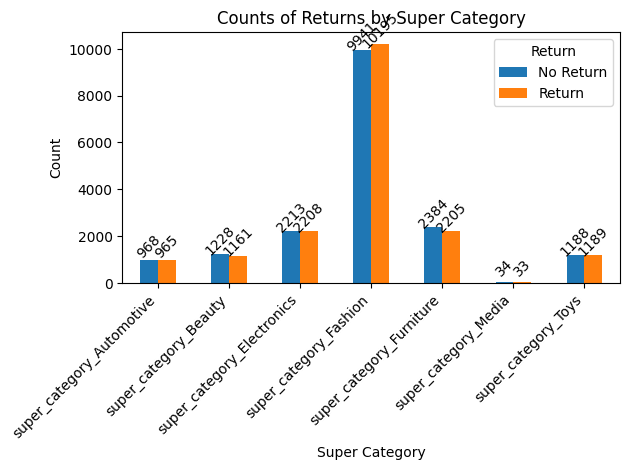

In [68]:
# Shorten the category names
return_counts['short_super_category'] = return_counts['super_category'].apply(lambda x: x.split(',')[0])  # Take the first part of the category name

# Group the data by 'short_super_category' and 'return'
grouped_data = return_counts.groupby(['short_super_category', 'return']).sum().unstack()

# Plotting
ax = grouped_data.plot(kind='bar', stacked=False)
plt.xlabel('Super Category')
plt.ylabel('Count')
plt.title('Counts of Returns by Super Category')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Return', loc='upper right', labels=['No Return', 'Return'])

# Add count values on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45 if p.get_height() > 0 else 0)

plt.tight_layout()
plt.show()


In [69]:
undersampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date                                                      35912 non-null  object 
 1   product_name                                              35912 non-null  float64
 2   main_category                                             35912 non-null  float64
 3   sub_category1                                             35912 non-null  float64
 4   sub_category2                                             35912 non-null  float64
 5   brand                                                     35912 non-null  float64
 6   retail_price                                              35912 non-null  float64
 7   discounted_price                                          35912 non-null  float64
 8   return          

#### Correlation Matrix

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = undersampled_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '2016-03-11'

#### Feature importance using decision tree

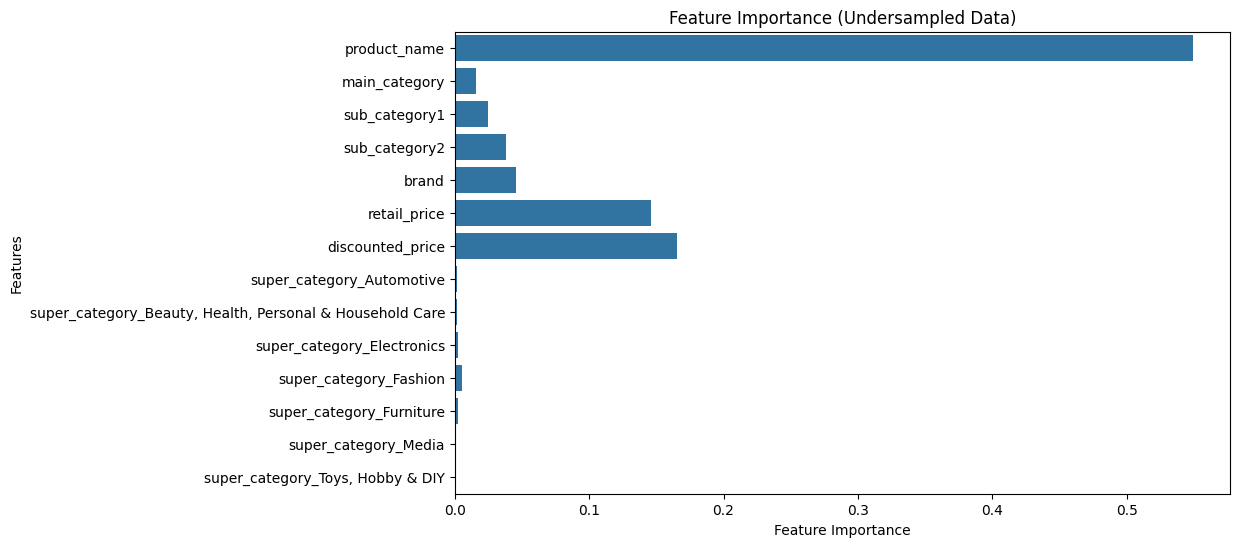

Accuracy: 0.1883614088820827

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.27      0.24      3544
           1       0.14      0.11      0.12      3639

    accuracy                           0.19      7183
   macro avg       0.18      0.19      0.18      7183
weighted avg       0.18      0.19      0.18      7183



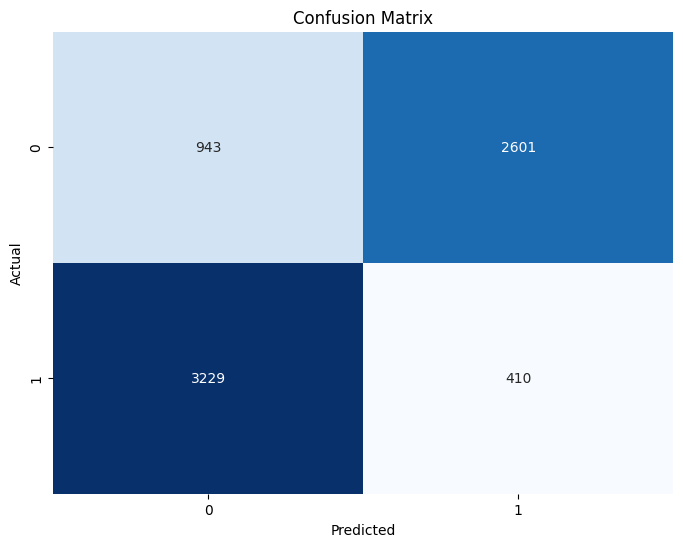

In [71]:
# Separate features and target variable
X_undersampled = undersampled_data.drop(['return','Date','super_category'], axis=1)
y_undersampled = undersampled_data['return']

# Create decision tree classifier
clf_undersampled = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf_undersampled.fit(X_undersampled, y_undersampled)

# Plot feature importance
feature_importance_undersampled = clf_undersampled.feature_importances_
feature_names_undersampled = X_undersampled.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_undersampled, y=feature_names_undersampled)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Undersampled Data)')
plt.show()

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
# Remove 'retail_price' from feature_names_undersampled
feature_names_undersampled = feature_names_undersampled.drop('retail_price')

KeyError: "['retail_price'] not found in axis"

In [74]:
feature_names_undersampled

Index(['product_name', 'main_category', 'sub_category1', 'sub_category2',
       'brand', 'discounted_price', 'super_category_Automotive',
       'super_category_Beauty, Health, Personal & Household Care',
       'super_category_Electronics', 'super_category_Fashion',
       'super_category_Furniture', 'super_category_Media',
       'super_category_Toys, Hobby & DIY'],
      dtype='object')

#### Grid search for decision Tree

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.49249896927578485
Accuracy: 0.49603229848252817

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.22      0.30      3544
           1       0.50      0.77      0.61      3639

    accuracy                           0.50      7183
   macro avg       0.49      0.49      0.45      7183
weighted avg       0.49      0.50      0.45      7183



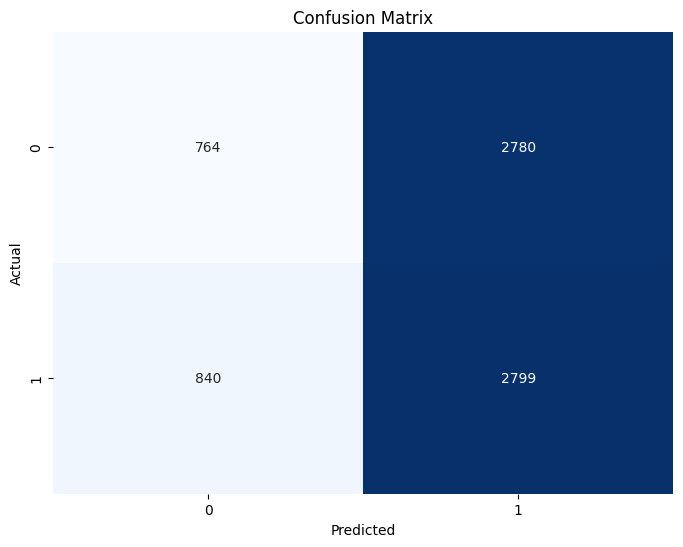

In [75]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy as the scoring metric
                           n_jobs=-1)  # Use all available CPU cores

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to create the final decision tree classifier
best_clf = DecisionTreeClassifier(random_state=42, **best_params)

# Train the classifier on the entire undersampled training data
best_clf.fit(X_train, y_train)

# Predict on test data
y_pred = best_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Final Decision Tree

Accuracy with custom decision tree parameters: 0.5117638869553112

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.07      0.13      3544
           1       0.51      0.94      0.66      3639

    accuracy                           0.51      7183
   macro avg       0.52      0.51      0.39      7183
weighted avg       0.52      0.51      0.40      7183



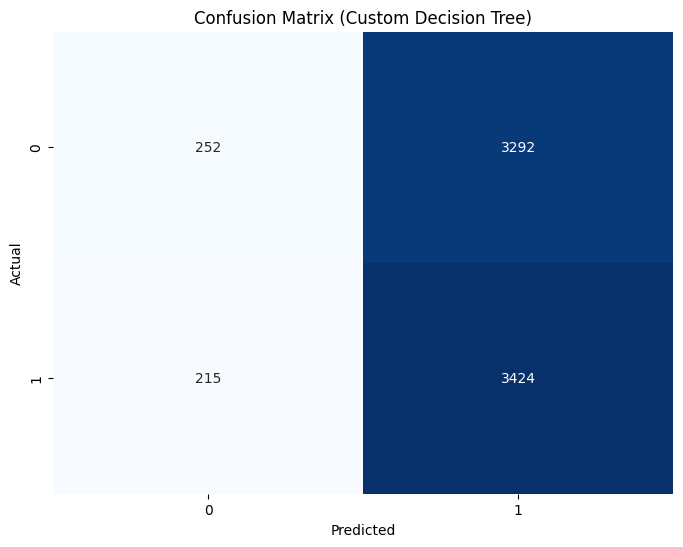

In [76]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameters for the decision tree
tree_params = {
    'criterion': 'entropy',
    'max_depth': 5,
    'min_samples_leaf': 1,
    'min_samples_split': 2
}

# Create the decision tree classifier with the specified parameters
custom_tree_clf = DecisionTreeClassifier(random_state=42, **tree_params)

# Train the classifier on the entire undersampled training data
custom_tree_clf.fit(X_train, y_train)

# Predict on test data
y_pred_custom_tree = custom_tree_clf.predict(X_test)

# Calculate accuracy
accuracy_custom_tree = accuracy_score(y_test, y_pred_custom_tree)

# Print accuracy
print("Accuracy with custom decision tree parameters:", accuracy_custom_tree)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom_tree))

# Plot confusion matrix
conf_matrix_custom_tree = confusion_matrix(y_test, y_pred_custom_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_custom_tree, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Custom Decision Tree)")
plt.show()


### SVM

#### Normal SVM

Accuracy with SVM: 0.5067520534595573

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3544
           1       0.51      0.51      0.51      3639

    accuracy                           0.51      7183
   macro avg       0.51      0.51      0.51      7183
weighted avg       0.51      0.51      0.51      7183



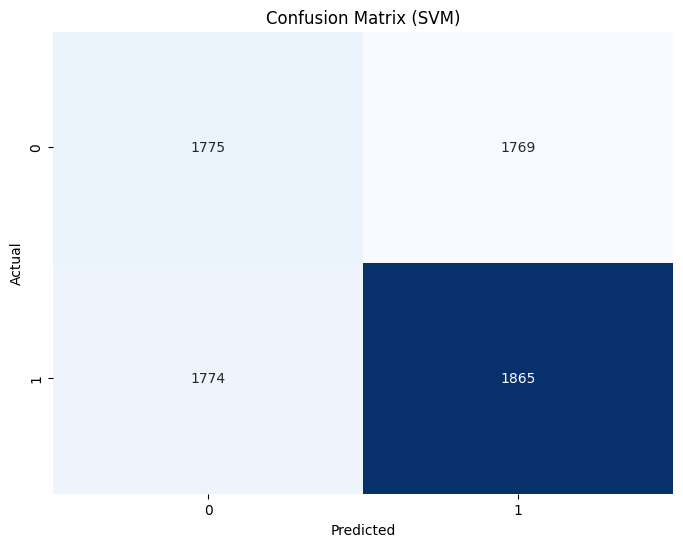

In [78]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVM
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print accuracy
print("Accuracy with SVM:", accuracy_svm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

#### Grid search and fitting best parameters

### lazypredict

In [79]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LazyClassifier
reg = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)

 97%|█████████▋| 28/29 [07:42<00:16, 16.47s/it]

[LightGBM] [Info] Number of positive: 14317, number of negative: 14412
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 645
[LightGBM] [Info] Number of data points in the train set: 28729, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498347 -> initscore=-0.006614
[LightGBM] [Info] Start training from score -0.006614


100%|██████████| 29/29 [07:43<00:00, 15.99s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.51               0.51     0.51      0.48   
CalibratedClassifierCV             0.51               0.51     0.51      0.49   
BernoulliNB                        0.51               0.51     0.51      0.51   
SVC                                0.51               0.51     0.51      0.48   
SGDClassifier                      0.50               0.51     0.51      0.44   
NearestCentroid                    0.51               0.51     0.51      0.50   
RidgeClassifierCV                  0.51               0.51     0.51      0.50   
RidgeClassifier                    0.51               0.51     0.51      0.50   
LinearDiscriminantAnalysis         0.51               0.51     0.51      0.50   
GaussianNB                         0.50               0.51     0.51      0.50   
LinearSVC                   

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit LazyClassifier
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print the model performance
print(models)

#### Normal

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named undersampled_data and the target column is 'return'

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Naive Bayes classifier
nb_model = GaussianNB()

# Train the Naive Bayes classifier
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy
print("Accuracy with Naive Bayes:", accuracy_nb)

# Print classification reportj
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()


#### Grid search and fitting best parameters

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named undersampled_data and the target column is 'return'

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Varying smoothing parameter
}

# Create the grid search object
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to create the final Naive Bayes classifier
best_nb_model = GaussianNB(**best_params)

# Train the classifier on the entire undersampled training data
best_nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = best_nb_model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy
print("Accuracy with Naive Bayes:", accuracy_nb)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Plot confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Naive Bayes)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named undersampled_data and the target column is 'return'

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to create the final Random Forest classifier
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the classifier on the entire undersampled training data
best_rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Accuracy with Random Forest:", accuracy_rf)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Plot confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()


In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named undersampled_data and the target column is 'return'

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {'logisticregression__C': [0.1, 1, 10, 100],
              'logisticregression__penalty': ['l1', 'l2'],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create the grid search object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best parameters to create the final Logistic Regression classifier
best_lr_model = LogisticRegression(max_iter=1000, **best_params)

# Train the classifier on the entire undersampled training data
best_lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = best_lr_model.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy
print("Accuracy with Logistic Regression:", accuracy_lr)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset and preprocess if necessary
# Assuming X and y are your features and target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Neural Network)")
plt.show()


### BernoulliNB

Accuracy: 0.5071697062508701
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      3544
           1       0.51      0.57      0.54      3639

    accuracy                           0.51      7183
   macro avg       0.51      0.51      0.50      7183
weighted avg       0.51      0.51      0.51      7183



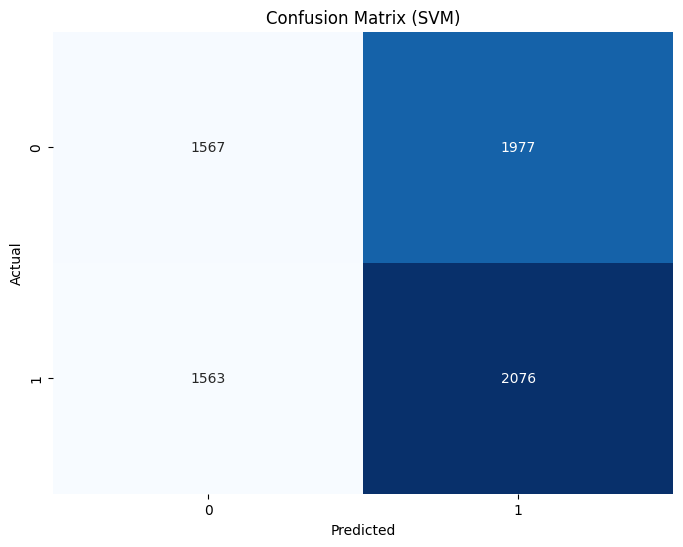

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Bernoulli Naive Bayes classifier
model = BernoulliNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


#### Grid Search with BernoulliNB

Best Parameters: {'alpha': 0.1, 'binarize': 0.0}
Best Score: 0.5060037865367181
Accuracy: 0.5071697062508701
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      3544
           1       0.51      0.57      0.54      3639

    accuracy                           0.51      7183
   macro avg       0.51      0.51      0.50      7183
weighted avg       0.51      0.51      0.51      7183



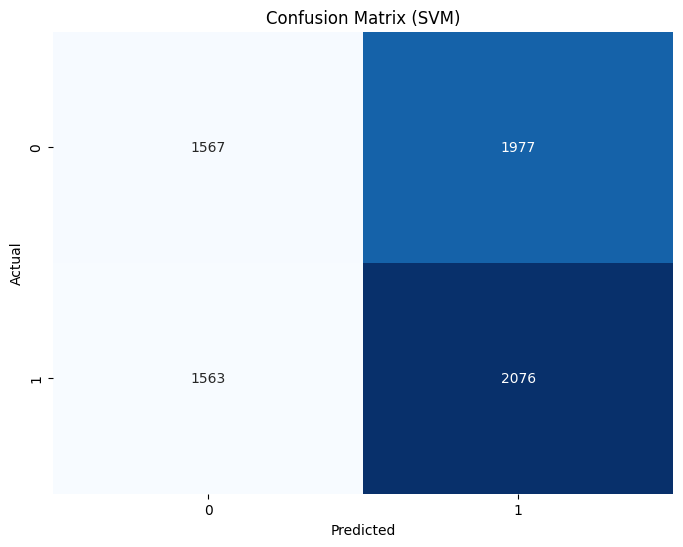

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter
    'binarize': [0.0, 0.5, 1.0],  # Threshold for binarizing features
}

# Initialize Bernoulli Naive Bayes classifier
model = BernoulliNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=15, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Initialize Bernoulli Naive Bayes classifier with best parameters
best_model = BernoulliNB(alpha=best_params['alpha'], binarize=best_params['binarize'])

# Train the model with best parameters
best_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


#### Batch wise fit

Accuracy: 0.5071697062508701
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.44      0.47      3544
           1       0.51      0.57      0.54      3639

    accuracy                           0.51      7183
   macro avg       0.51      0.51      0.50      7183
weighted avg       0.51      0.51      0.51      7183



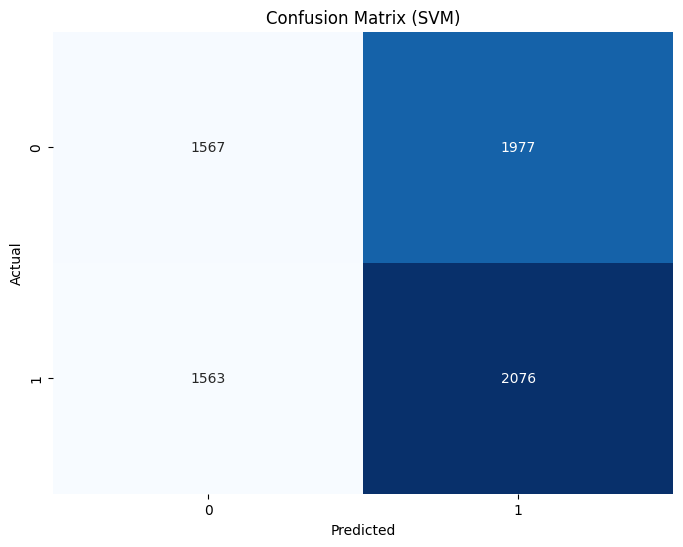

In [104]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define batch size
batch_size = 10

# Calculate the number of batches
num_batches = len(X_train) // batch_size + 1

# Initialize Bernoulli Naive Bayes classifier with best parameters
best_model = BernoulliNB(alpha=0.1, binarize=0.0)

# Fit the model in batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(X_train))
    
    X_batch = X_train.iloc[start_idx:end_idx]
    y_batch = y_train.iloc[start_idx:end_idx]
    
    # Train the model on the current batch
    best_model.partial_fit(X_batch, y_batch, classes=[0, 1])

# Predict on the testing set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


### QuadraticDiscriminantAnalysis

Accuracy: 0.506612835862453
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27      3544
           1       0.51      0.82      0.63      3639

    accuracy                           0.51      7183
   macro avg       0.50      0.50      0.45      7183
weighted avg       0.50      0.51      0.45      7183



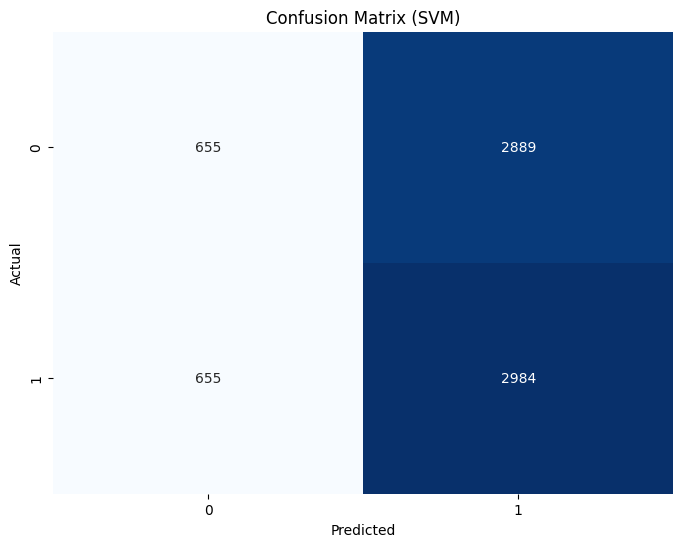

In [101]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Quadratic Discriminant Analysis classifier
qda = QuadraticDiscriminantAnalysis()

# Train the model on the training data
qda.fit(X_train, y_train)

# Predict on the testing set
y_pred = qda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


Best Parameters: {'reg_param': 0.0, 'store_covariance': True, 'tol': 0.001}
Best Score: 0.505412809213478
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27      3544
           1       0.51      0.82      0.63      3639

    accuracy                           0.51      7183
   macro avg       0.50      0.50      0.45      7183
weighted avg       0.50      0.51      0.45      7183



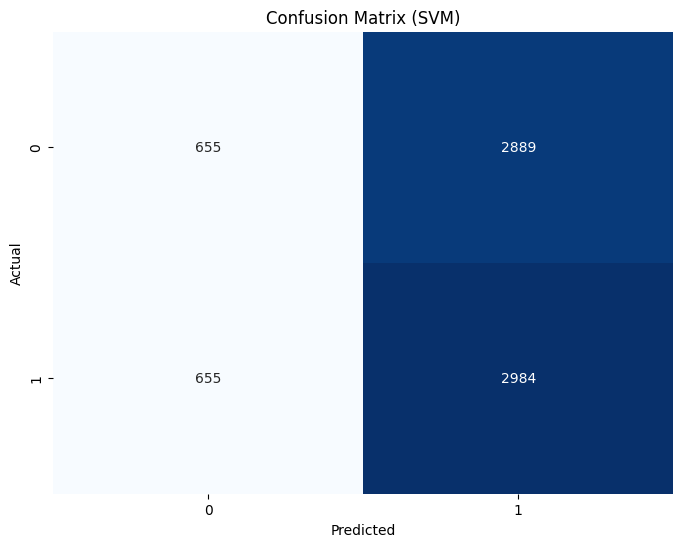

In [100]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.5, 1.0],  # Regularization parameter
    'tol': [1e-3, 1e-4, 1e-5],  # Tolerance for optimization
    'store_covariance': [True, False],  # Whether to store covariance matrices
}

# Initialize Quadratic Discriminant Analysis classifier
qda = QuadraticDiscriminantAnalysis()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=qda, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Initialize Quadratic Discriminant Analysis classifier with best parameters
best_qda = QuadraticDiscriminantAnalysis(**best_params)

# Train the model with best parameters
best_qda.fit(X_train, y_train)

# Predict on the testing set
y_pred = best_qda.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.00      0.00      3544
           1       0.51      1.00      0.67      3639

    accuracy                           0.51      7183
   macro avg       0.55      0.50      0.34      7183
weighted avg       0.54      0.51      0.34      7183



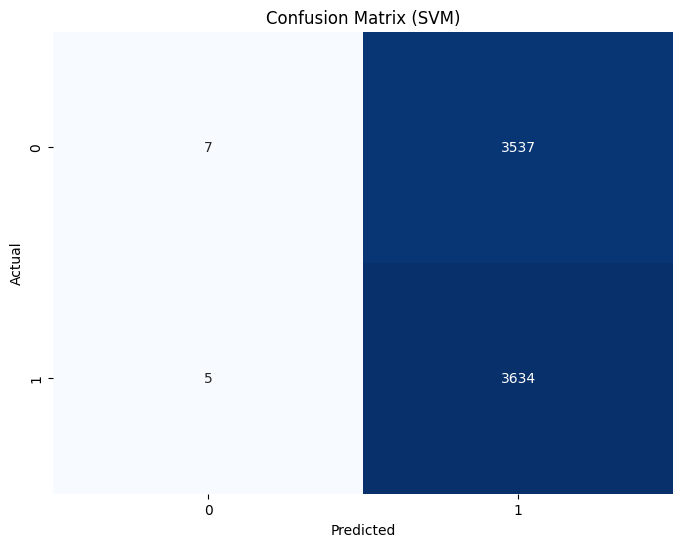

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Quadratic Discriminant Analysis classifier as base classifier
base_clf = QuadraticDiscriminantAnalysis()

# Train base classifier on training data
base_clf.fit(X_train, y_train)

# Initialize CalibratedClassifierCV with prefit mode
calibrated_clf = CalibratedClassifierCV(base_clf, cv="prefit")

# Fit the calibrated classifier on the calibration data (X_test, y_test)
calibrated_clf.fit(X_test, y_test)

# Predict on the testing set
y_pred = calibrated_clf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()


### SVC

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.04      0.07      3544
           1       0.51      0.97      0.67      3639

    accuracy                           0.51      7183
   macro avg       0.52      0.50      0.37      7183
weighted avg       0.52      0.51      0.37      7183



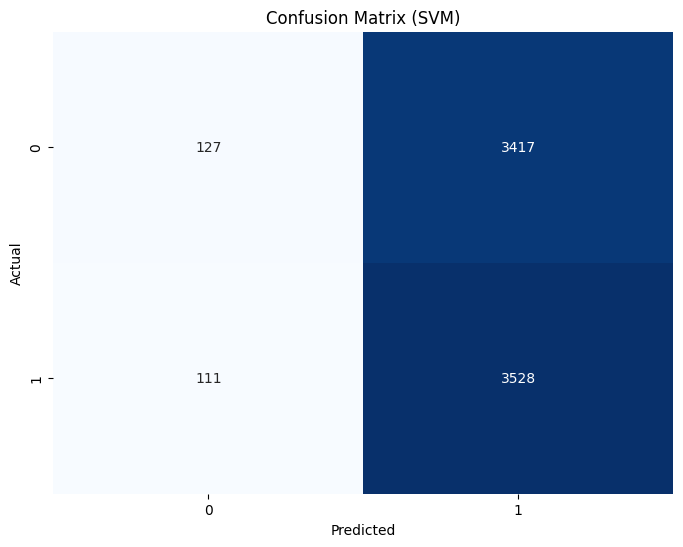

In [106]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier (SVC)
base_clf = SVC(probability=True)  # Set probability=True to enable probability estimates

# Train base classifier on training data
base_clf.fit(X_train, y_train)

# Initialize CalibratedClassifierCV with sigmoid calibration
calibrated_clf = CalibratedClassifierCV(base_clf, method='sigmoid', cv='prefit')

# Fit the calibrated classifier on the calibration data (X_test, y_test)
calibrated_clf.fit(X_test, y_test)

# Predict on the testing set
y_pred = calibrated_clf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [107]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5088403174161213


In [ ]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# Separate features and target variable
X = undersampled_data[feature_names_undersampled]  # Using feature_names_undersampled as input features
y = undersampled_data['return']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Support Vector Classifier (SVC)
base_clf = SVC(probability=True)  # Set probability=True to enable probability estimates

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Degree of the polynomial kernel function
    'class_weight': [None, 'balanced'],  # Weight associated with classes for penalty term
    'shrinking': [True, False],  # Whether to use the shrinking heuristic
}

# Initialize GridSearchCV
grid_search = GridSearchCV(base_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Initialize Support Vector Classifier (SVC) with best parameters
best_clf = SVC(probability=True, **best_params)

# Initialize CalibratedClassifierCV with sigmoid calibration
calibrated_clf = CalibratedClassifierCV(best_clf, method='sigmoid', cv='prefit')

# Fit the calibrated classifier on the calibration data (X_test, y_test)
calibrated_clf.fit(X_test, y_test)

# Predict on the testing set
y_pred = calibrated_clf.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()
